In [32]:
import xgboost as xgb
import pandas as pd
import numpy as np
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
diabetes_df = pd.read_csv("../Resources/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [34]:
demo_df = diabetes_df.filter(["Diabetes_binary","Sex","Age","Education","Income"]).copy()
demo_df

,Diabetes_binary,Sex,Age,Education,Income
0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,12.0,6.0,8.0
2,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...
70687,1.0,0.0,6.0,4.0,1.0
70688,1.0,1.0,10.0,3.0,6.0
70689,1.0,0.0,13.0,6.0,4.0
70690,1.0,0.0,11.0,2.0,4.0


In [35]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diabetes_binary  70692 non-null  float64
 1   Sex              70692 non-null  float64
 2   Age              70692 non-null  float64
 3   Education        70692 non-null  float64
 4   Income           70692 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB


In [36]:
demo_df['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X = demo_df.drop(columns='Diabetes_binary')
y = demo_df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
from sklearn.pipeline import Pipeline
#from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBClassifier(random_state=8))
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=8, ...))])

In [39]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__maxdepth' : Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample' : Real(.5,1),
    "clf__colsample_bytree": Real(.5,1),
    "clf__colsample_bylevel": Real(.5,1),
    "clf__colsample_bynode": Real(.5,1),
    "clf__reg_lambda": Real(0,10),
    "clf__gamma": Real(0,10)
}
opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring="roc_auc", random_state=1)

In [41]:
opt.fit(X_train, y_train)

[10:40:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "maxdepth" } are not used.

[10:40:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "maxdepth" } are not used.

[10:40:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "maxdepth" } are not used.

[10:40:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "maxdepth" } are not used.

[10:40:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "maxdepth" } are not used.

[10:40:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None, gpu_id=None,
                                                       grow_policy=None,
                                                       importance_type=N...
                             'clf__gamma': Real(low=0, high=10, prior='uniform', transform='normalize'),
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__maxdepth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0, high=10, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1, prior='uniform', transform='normalize')})

In [42]:
opt.best_score_

0.708064913045654

In [43]:
opt.score(X_test, y_test)

0.7197054082411048

In [44]:
opt.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1])

In [45]:
opt.predict_proba(X_test)

array([[0.88755804, 0.11244196],
       [0.7998732 , 0.20012684],
       [0.38338292, 0.6166171 ],
       ...,
       [0.2779656 , 0.7220344 ],
       [0.40258318, 0.5974168 ],
       [0.3318088 , 0.6681912 ]], dtype=float32)

In [46]:
opt.best_estimator_.steps

[('encoder', TargetEncoder(cols=[])),
 ('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.9837828982141709,
                colsample_bynode=0.7157293897471988,
                colsample_bytree=0.7989222031658678, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=1.9801949495486166, gpu_id=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.07628548284717386, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None, maxdepth=2,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

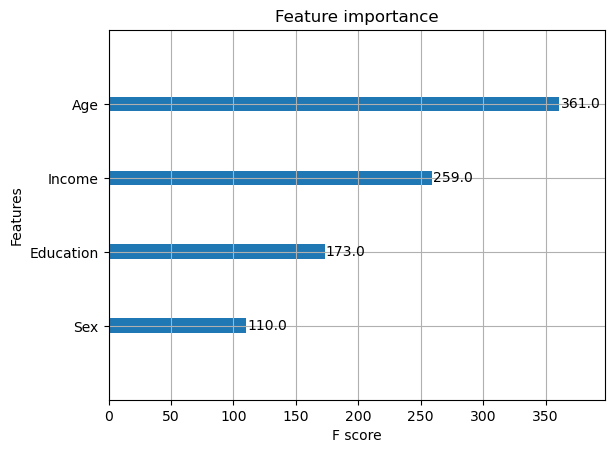

In [48]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)